In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

In [3]:
pf8_calls = pd.read_csv('./pf8_cnv_sampledata.txt', sep = '\t')

In [4]:
pf8_calls['Country'].unique()

array(['Mauritania', 'Gambia', 'Guinea', 'Kenya', 'Thailand', 'Tanzania',
       'Ghana', 'Cambodia', 'Indonesia', 'Burkina Faso', 'Mali',
       'Papua New Guinea', 'Peru', 'Bangladesh', 'Malawi', 'Vietnam',
       'Colombia', 'Venezuela', 'Uganda', 'Myanmar', 'Laos',
       'Democratic Republic of the Congo', 'Nigeria', 'Madagascar',
       'Cameroon', "Côte d'Ivoire", 'Ethiopia', 'Benin', 'Senegal',
       'Gabon', 'India', 'Sudan', 'Mozambique'], dtype=object)

In [25]:
def get_country_calls(country, min_threshold):
    country_dups = pf8_calls.loc[
    (pf8_calls['Country'] == country) &
    (pf8_calls['MDR1_final_amplification_call'] != -1)
    ]
    #print(country_dups.head())
    long_country_data = country_dups.groupby("Year")['MDR1_final_amplification_call'].apply(lambda x: pd.Series({
    "ratio": sum(x == 1) / sum(x != -1),
    "cnv_gt_1": sum(x == 1),
    "cnv_gt_0_1": sum(x != -1)
    })).unstack().reset_index().astype({"Year": int, "cnv_gt_1": int, "cnv_gt_0_1": int})
    mask_country = (long_country_data['cnv_gt_0_1'] > min_threshold)
    long_country_data = long_country_data[mask_country]
    print(long_country_data)
    
    return long_country_data

In [26]:
thai_dups = get_country_calls('Thailand', min_threshold=0)
myan_dups = get_country_calls('Myanmar', min_threshold = 0)


    Year     ratio  cnv_gt_1  cnv_gt_0_1
0   2001  0.437500        14          32
1   2002  0.489796        24          49
2   2003  0.346667        26          75
3   2004  0.547945        40          73
4   2005  0.585366        24          41
5   2006  1.000000         2           2
6   2007  0.592593        16          27
7   2008  0.484252       123         254
8   2009  0.500000         8          16
9   2010  0.428571         6          14
10  2011  0.517241        30          58
11  2012  0.619469        70         113
12  2013  0.666667        74         111
13  2014  0.250000         1           4
14  2015  0.111111         2          18
15  2016  0.000000         0           5
16  2017  0.000000         0           4
17  2018  0.024390         1          41
   Year     ratio  cnv_gt_1  cnv_gt_0_1
0  2011  0.150685        11          73
1  2012  0.089888         8          89
2  2013  0.136364         9          66
3  2014  0.000000         0          32
4  2015  0.000000    

In [11]:
def get_loc(obj):
    bottom_left = obj.get_corners()[0]
    top_right= obj.get_corners()[2]
    height_avg = (bottom_left[1] + top_right[1])/2
    width_avg = (bottom_left[0] + top_right[0])/2
    return [width_avg, height_avg]

def make_txt(obj, txt):
    loc = get_loc(obj)
    ax.text(loc[0], loc[1], 
        txt,
        ha = 'center',
        va = 'center')

NameError: name 'thai_long_filt' is not defined

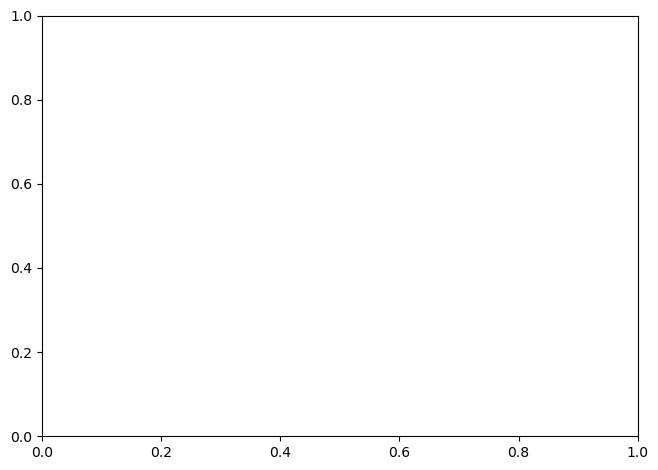

In [27]:
fig = plt.figure(tight_layout = True, figsize = [6.4*2, 4.8])
ax1 = fig.add_subplot(1,2, 1)
ax1.scatter(thai_long_filt['Year'], thai_long_filt['ratio'], label = 'Thailand')
ax1.scatter(myan_long_filt['Year'], myan_long_filt['ratio'], label = 'Myanmar')
ax1.axvspan(xmin = 2000, 
           xmax = 2015, 
           color = 'lightgrey', 
           lw = 0,
           alpha = .5, 
           label = 'MFQ frontline')
ax1.set(
    xlim = [2000, 2019],
    ylim = [-0.03333333333333333, 1],
    xticks = np.arange(2000, 2020, 4),
    xticklabels = np.arange(2000, 2020, 4),
    xlabel = 'year',
    ylabel = '$mdr1$ duplication frequency'
    
)
ax1.legend()

ax = fig.add_subplot(1, 2, 2)

width = .1
height = .1
center = .5
color = 'dodgerblue'
offset = .0125

WT = patches.Rectangle(
    xy = (.2 -.5*height, center - .5*height),
    width = width,
    height = height,
    edgecolor = 'grey',
    facecolor = 'grey',
    alpha = .25
)
ax.add_patch(WT)
make_txt(WT, 'WT')

CN2 = patches.Rectangle(
    xy = (.5 -.5*width, center - .5*height),
    width = width,
    height = height,
    edgecolor = 'dodgerblue',
    facecolor = 'dodgerblue',
    alpha = .25
)

ax.add_patch(CN2)
make_txt(CN2, 'CN2')

CN3 = patches.Rectangle(
    xy = (.8 -.5*width, center - .5*height),
    width = width,
    height = height,
    edgecolor = 'dodgerblue',
    facecolor = 'dodgerblue',
    alpha = .5
)

ax.add_patch(CN3)
make_txt(CN3, 'CN3')

CN4 = patches.Rectangle(
    xy = (1.1 -.5*width, center - .5*height),
    width = width,
    height = height,
    edgecolor = 'dodgerblue',
    facecolor = 'dodgerblue',
    alpha = .75
)

ax.add_patch(CN4)
make_txt(CN4, 'CN4')

#WT<-> CN2
wt_loc = get_loc(WT)
cn2_loc = get_loc(CN2)
ax.annotate("", xytext=(wt_loc[0] + .5*width, wt_loc[1]+offset), xy=(cn2_loc[0]-.5*width, cn2_loc[1]+offset),
            arrowprops=dict(arrowstyle="->"))
ax.text(x = (wt_loc[0] + .5*width + cn2_loc[0]-.5*width)/2, 
        y = cn2_loc[1]+2*offset,
        s = rf'$\alpha_1$(WT)',
        ha = 'center',
        va = 'center')

ax.annotate("", xytext=(wt_loc[0] + .5*width, wt_loc[1]-offset), xy=(cn2_loc[0]-.5*width, cn2_loc[1]-offset),
            arrowprops=dict(arrowstyle="<-"))
ax.text(x = (wt_loc[0] + .5*width + cn2_loc[0]-.5*width)/2, 
        y = cn2_loc[1]-2*offset,
        s = rf'$\alpha_2$(CN2)',
        ha = 'center',
        va = 'center')

#CN2<-> CN3
cn3_loc = get_loc(CN3)
ax.annotate("", xytext=(cn2_loc[0] + .5*width, cn2_loc[1]+offset), xy=(cn3_loc[0]-.5*width, cn3_loc[1]+offset),
            arrowprops=dict(arrowstyle="->"))
ax.text(x = (cn2_loc[0] + .5*width + cn3_loc[0]-.5*width)/2, 
        y = cn3_loc[1]+2*offset,
        s = rf'$\beta_1$(CN2)',
        ha = 'center',
        va = 'center')

ax.annotate("", xytext=(cn2_loc[0] + .5*width, cn2_loc[1]-offset), xy=(cn3_loc[0]-.5*width, cn3_loc[1]-offset),
            arrowprops=dict(arrowstyle="<-"))
ax.text(x = (cn2_loc[0] + .5*width + cn3_loc[0]-.5*width)/2, 
        y = cn3_loc[1]-2*offset,
        s = rf'$\beta_2$(CN3)',
        ha = 'center',
        va = 'center')

#CN3<-> CN4
cn4_loc = get_loc(CN4)
ax.annotate("", xytext=(cn3_loc[0] + .5*width, cn3_loc[1]+offset), xy=(cn4_loc[0]-.5*width, cn4_loc[1]+offset),
            arrowprops=dict(arrowstyle="->"))
ax.text(x = (cn3_loc[0] + .5*width + cn4_loc[0]-.5*width)/2, 
        y = cn4_loc[1]+2*offset,
        s = rf'$\delta_1$(CN3)',
        ha = 'center',
        va = 'center')

ax.annotate("", xytext=(cn3_loc[0] + .5*width, cn3_loc[1]-offset), xy=(cn4_loc[0]-.5*width, cn4_loc[1]-offset),
            arrowprops=dict(arrowstyle="<-"))
ax.text(x = (cn3_loc[0] + .5*width + cn4_loc[0]-.5*width)/2, 
        y = cn4_loc[1]-2*offset,
        s = rf'$\delta_2$(CN4)',
        ha = 'center',
        va = 'center')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set(
        xticks = [],
        yticks = [], 
        xticklabels = [],
        yticklabels = [],
        xlim = [0, 1.25],
        ylim = [.2, .8]
)

fig.savefig('cnv_dag.png', dpi = 400)

ax1.text(s = '(A)', x = 1997, y = 1, fontweight = 'bold', fontsize = 12)
ax.text(s = '(B)', x = -.1, y = .8, fontweight = 'bold', fontsize = 12)
fig.savefig('./figures/mdr1_temporal_frequency_thaivsmyan.png', dpi = 400)

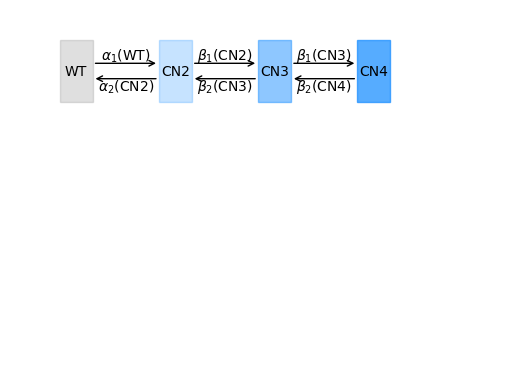

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

width = .1
height = .1
center = .5
color = 'dodgerblue'
offset = .0125

WT = patches.Rectangle(
    xy = (.2 -.5*height, center - .5*height),
    width = width,
    height = height,
    edgecolor = 'grey',
    facecolor = 'grey',
    alpha = .25
)
ax.add_patch(WT)
make_txt(WT, 'WT')

CN2 = patches.Rectangle(
    xy = (.5 -.5*width, center - .5*height),
    width = width,
    height = height,
    edgecolor = 'dodgerblue',
    facecolor = 'dodgerblue',
    alpha = .25
)

ax.add_patch(CN2)
make_txt(CN2, 'CN2')

CN3 = patches.Rectangle(
    xy = (.8 -.5*width, center - .5*height),
    width = width,
    height = height,
    edgecolor = 'dodgerblue',
    facecolor = 'dodgerblue',
    alpha = .5
)

ax.add_patch(CN3)
make_txt(CN3, 'CN3')

CN4 = patches.Rectangle(
    xy = (1.1 -.5*width, center - .5*height),
    width = width,
    height = height,
    edgecolor = 'dodgerblue',
    facecolor = 'dodgerblue',
    alpha = .75
)

ax.add_patch(CN4)
make_txt(CN4, 'CN4')

#WT<-> CN2
wt_loc = get_loc(WT)
cn2_loc = get_loc(CN2)
ax.annotate("", xytext=(wt_loc[0] + .5*width, wt_loc[1]+offset), xy=(cn2_loc[0]-.5*width, cn2_loc[1]+offset),
            arrowprops=dict(arrowstyle="->"))
ax.text(x = (wt_loc[0] + .5*width + cn2_loc[0]-.5*width)/2, 
        y = cn2_loc[1]+2*offset,
        s = rf'$\alpha_1$(WT)',
        ha = 'center',
        va = 'center')

ax.annotate("", xytext=(wt_loc[0] + .5*width, wt_loc[1]-offset), xy=(cn2_loc[0]-.5*width, cn2_loc[1]-offset),
            arrowprops=dict(arrowstyle="<-"))
ax.text(x = (wt_loc[0] + .5*width + cn2_loc[0]-.5*width)/2, 
        y = cn2_loc[1]-2*offset,
        s = rf'$\alpha_2$(CN2)',
        ha = 'center',
        va = 'center')

#CN2<-> CN3
cn3_loc = get_loc(CN3)
ax.annotate("", xytext=(cn2_loc[0] + .5*width, cn2_loc[1]+offset), xy=(cn3_loc[0]-.5*width, cn3_loc[1]+offset),
            arrowprops=dict(arrowstyle="->"))
ax.text(x = (cn2_loc[0] + .5*width + cn3_loc[0]-.5*width)/2, 
        y = cn3_loc[1]+2*offset,
        s = rf'$\beta_1$(CN2)',
        ha = 'center',
        va = 'center')

ax.annotate("", xytext=(cn2_loc[0] + .5*width, cn2_loc[1]-offset), xy=(cn3_loc[0]-.5*width, cn3_loc[1]-offset),
            arrowprops=dict(arrowstyle="<-"))
ax.text(x = (cn2_loc[0] + .5*width + cn3_loc[0]-.5*width)/2, 
        y = cn3_loc[1]-2*offset,
        s = rf'$\beta_2$(CN3)',
        ha = 'center',
        va = 'center')

#CN3<-> CN4
cn4_loc = get_loc(CN4)
ax.annotate("", xytext=(cn3_loc[0] + .5*width, cn3_loc[1]+offset), xy=(cn4_loc[0]-.5*width, cn4_loc[1]+offset),
            arrowprops=dict(arrowstyle="->"))
ax.text(x = (cn3_loc[0] + .5*width + cn4_loc[0]-.5*width)/2, 
        y = cn4_loc[1]+2*offset,
        s = rf'$\beta_1$(CN3)',
        ha = 'center',
        va = 'center')

ax.annotate("", xytext=(cn3_loc[0] + .5*width, cn3_loc[1]-offset), xy=(cn4_loc[0]-.5*width, cn4_loc[1]-offset),
            arrowprops=dict(arrowstyle="<-"))
ax.text(x = (cn3_loc[0] + .5*width + cn4_loc[0]-.5*width)/2, 
        y = cn4_loc[1]-2*offset,
        s = rf'$\beta_2$(CN4)',
        ha = 'center',
        va = 'center')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set(
        xticks = [],
        yticks = [], 
        xticklabels = [],
        yticklabels = [],
        xlim = [0, 1.5],
        ylim = [0, .6]
)

fig.savefig('cnv_dag.png', dpi = 400)